# QUESTION

Part One: Go to the Social Security Administration US births website(https://www.ssa.gov/oact/babynames/numberUSbirths.html) and select the births table there and copy it to your clipboard. Use the pandas read_clipboard function to read the table into Python, and use matplotlib to plot male and female births for the years covered in the data. Put this in an ipython notebook file. In the same notebook, use Python to get a list of male and female names from these files(https://www.dropbox.com/s/885phnsm7g5eytm/baby_names.zip?dl=0) This data is broken down by year of birth. 

Part Two: Aggregate the data for all years (see the examples in the Pandas notebooks). Use Python Counters to get letter frequencies for male and female names. Use matplotlib to draw a plot that for each letter (x-axis) shows the frequency of that letter (y-axis) as the last letter for both for male and female names. 

Part Three: Now do just female names, but aggregate your data in decades (10 year) increments. Produce a plot that contains the 1880s line, the 1940s line, and the 1990s line, as well as the female line for all years aggregated together from Part Two. Evaluate how stable this statistic is. Speculate on why it is is stable, if it is, or on what demographic facts might explain any changes, if there are any. Turn in your ipython notebook file, showing the code you used to complete parts One, Two, an Three.

In [1]:
import sklearn
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data=pd.read_clipboard(skiprows=1)
print(data)

     birth       Male     Female      Total
0     1880    118,400     97,604    216,004
1     1881    108,282     98,855    207,137
2     1882    122,031    115,695    237,726
3     1883    112,477    120,059    232,536
4     1884    122,739    137,586    260,325
5     1885    115,945    141,949    257,894
6     1886    119,041    153,735    272,776
7     1887    109,315    155,422    264,737
8     1888    129,906    189,447    319,353
9     1889    119,033    189,219    308,252
10    1890    119,701    201,661    321,362
11    1891    109,265    196,567    305,832
12    1892    131,453    224,913    356,366
13    1893    121,040    225,232    346,272
14    1894    124,893    235,972    360,865
15    1895    126,644    247,106    373,750
16    1896    129,071    251,993    381,064
17    1897    121,942    248,276    370,218
18    1898    132,104    274,145    406,249
19    1899    115,194    247,490    362,684
20    1900    162,136    317,765    479,901
21    1901    115,596    254,231

In [3]:
#Male_count = data['Male']
Female_count = data['Female']
birth_count = pd.Series(data['birth']).astype(int)
male_list = []
female_list = []
birth_list = []

for i in data['Male']:
    i = str.replace(i,',','')
    male_list.append(int(i))

for i in data['birth']:
    birth_list.append(int(i))

for i in data['Female']:
    i = str.replace(i,',','')
    female_list.append(int(i))
#print(type(male_list)

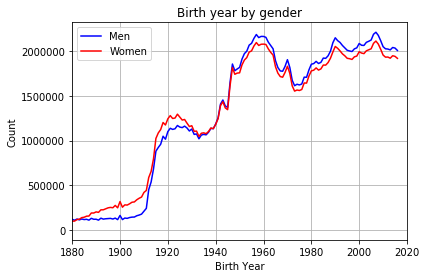

In [4]:
#ind = np.arange(birth_count[0], birth_count[135], 25)
width = 0.35 

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, Male_count, width, color='r')

rects1 = ax.plot(birth_list, male_list, width, color='b')
rects2 = ax.plot(birth_list, female_list, width, color='r')
#ax.set_yscale('log')
ax.set_xlim(1880, 2020)
#ax.set_ylim(5e4, 5e6)
ax.set_xlabel('Birth Year')
ax.set_ylabel('Count')
ax.set_title('Birth year by gender')
ax.grid(True)

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

plt.savefig(os.path.join('birthYear.png'), dpi=300, format='png', bbox_inches='tight')


# PART 2

In [5]:
import pandas as pd
years = range(1881,2011)
pieces = []
columns = ['name','sex','births']
    
for year in years:
    path = '../baby_names/names/yob{0:d}.txt'.format(year)
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)    
    
names = pd.concat(pieces, ignore_index=True)

In [6]:
names.head()

,name,sex,births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881


In [7]:
import collections
names.name = names.name.astype(str).str.lower()
female_totalLetterCount = collections.Counter("".join(names.loc[names.sex.astype(str) == 'F'].name.astype(str)))
male_totalLetterCount = collections.Counter("".join(names.loc[names.sex.astype(str) == 'M'].name.astype(str)))

print("Female Letters count: ")
print(female_totalLetterCount)
print("Male Letters Count: ")
print(male_totalLetterCount)

Female Letters count: 
Counter({'a': 1106691, 'e': 808732, 'n': 586892, 'i': 558570, 'l': 499178, 'r': 418955, 's': 271518, 't': 267157, 'y': 221353, 'h': 219581, 'o': 208432, 'm': 188030, 'd': 184736, 'c': 153819, 'k': 111843, 'u': 86084, 'j': 82958, 'b': 73211, 'v': 66889, 'g': 62188, 'z': 35572, 'p': 31781, 'f': 28774, 'w': 23138, 'q': 12479, 'x': 7608})
Male Letters Count: 
Counter({'a': 473311, 'e': 461160, 'n': 367462, 'r': 358075, 'i': 294758, 'l': 288703, 'o': 286286, 's': 181320, 'd': 174305, 't': 164948, 'm': 134677, 'h': 127314, 'y': 114680, 'c': 113693, 'u': 99128, 'k': 75215, 'b': 68392, 'j': 64378, 'v': 59996, 'g': 54872, 'w': 38851, 'f': 35285, 'p': 31022, 'z': 23641, 'q': 10758, 'x': 7561})


In [10]:
temp = names.loc[names.sex.astype(str) == 'F'].name.astype(str)
temp1 = []
iterator = 1
for i in temp[0:-1]:
    temp1.append(i[-1:])
female_lastLetterCount = collections.Counter("".join(temp1))
print("Female Last Letter Frequency: ")
print(female_lastLetterCount)

temp = names.loc[names.sex.astype(str) == 'M'].name.astype(str)
temp2 = []
iterator = 1
for i in temp[0:-1]:
    temp2.append(i[-1:])
male_lastLetterCount = collections.Counter("".join(temp2))
print("Male Last Letter Frequency: ")
print(male_lastLetterCount)

temp = names.name.astype(str)
temp3 = []
iterator = 1
for i in temp[0:-1]:
    temp3.append(i[-1:])
total_lastLetterCount = collections.Counter("".join(temp3))
print("Total Last Letter Frequency: ")
print(total_lastLetterCount)

Female Last Letter Frequency: 
Counter({'a': 422650, 'e': 226254, 'n': 101182, 'y': 61742, 'i': 44042, 'h': 38365, 'l': 35834, 's': 19402, 'r': 14056, 't': 10528, 'o': 8316, 'd': 6464, 'm': 3610, 'u': 2019, 'z': 1843, 'g': 1735, 'k': 1548, 'x': 843, 'c': 760, 'w': 640, 'b': 441, 'p': 355, 'j': 157, 'f': 125, 'v': 107, 'q': 24})
Male Last Letter Frequency: 
Counter({'n': 162164, 'e': 89489, 'l': 59630, 'o': 54056, 'y': 53839, 's': 51797, 'r': 39092, 'd': 36761, 'a': 24564, 't': 21226, 'h': 17462, 'i': 17253, 'k': 13634, 'm': 12404, 'g': 5071, 'c': 5033, 'z': 4175, 'b': 3222, 'f': 3042, 'u': 2657, 'w': 2230, 'p': 1941, 'x': 1919, 'v': 1379, 'j': 1200, 'q': 500})
Total Last Letter Frequency: 
Counter({'a': 447215, 'e': 315743, 'n': 263346, 'y': 115581, 'l': 95464, 's': 71199, 'o': 62372, 'i': 61295, 'h': 55827, 'r': 53148, 'd': 43225, 't': 31754, 'm': 16014, 'k': 15182, 'g': 6806, 'z': 6018, 'c': 5793, 'u': 4676, 'b': 3663, 'f': 3167, 'w': 2870, 'x': 2762, 'p': 2296, 'v': 1486, 'j': 1357,

In [11]:
sorted(female_lastLetterCount.items())
sorted(male_lastLetterCount.items())
sorted(total_lastLetterCount.items())

[('a', 447215),
 ('b', 3663),
 ('c', 5793),
 ('d', 43225),
 ('e', 315743),
 ('f', 3167),
 ('g', 6806),
 ('h', 55827),
 ('i', 61295),
 ('j', 1357),
 ('k', 15182),
 ('l', 95464),
 ('m', 16014),
 ('n', 263346),
 ('o', 62372),
 ('p', 2296),
 ('q', 524),
 ('r', 53148),
 ('s', 71199),
 ('t', 31754),
 ('u', 4676),
 ('v', 1486),
 ('w', 2870),
 ('x', 2762),
 ('y', 115581),
 ('z', 6018)]

In [12]:
labelsF, valuesF = zip(*sorted(female_lastLetterCount.items()))
labelsM, valuesM = zip(*sorted(male_lastLetterCount.items()))
labelsT, valuesT = zip(*sorted(total_lastLetterCount.items()))

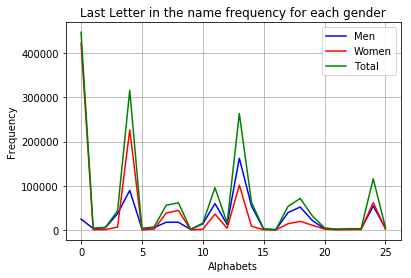

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
indexes = np.arange(len(labelsF))

width = 0.35 

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, Male_count, width, color='r')

rects1 = ax.plot(indexes, valuesM, width, color='b')
rects2 = ax.plot(indexes, valuesF, width, color='r')
rects3 = ax.plot(indexes, valuesT, width, color='g')

ax.set_title('Last Letter in the name frequency for each gender')
ax.grid(True)
ax.legend((rects1[0], rects2[0], rects3[0]), ('Men', 'Women','Total'))
ax.set_xlabel('Alphabets')
ax.set_ylabel('Frequency')
plt.show()
plt.savefig(os.path.join('lastLetter.png'), dpi=300, format='png', bbox_inches='tight')

# PART 3

In [14]:
temp = names.loc[(names.sex.astype(str) == 'F') & (names.year.astype(str) >= '1880') & (names.year.astype(str) < '1890')].name.astype(str)
temp4 = []
iterator = 1
for i in temp[0:-1]:
    temp4.append(i[-1:])
f1880_lastLetterCount = collections.Counter("".join(temp4))
print("Female Last Letter Frequency in 1880s: ")
print(f1880_lastLetterCount)

temp = names.loc[(names.sex.astype(str) == 'F') & (names.year.astype(str) >= '1940') & (names.year.astype(str) < '1950')].name.astype(str)
temp5 = []
iterator = 1
for i in temp[0:-1]:
    temp5.append(i[-1:])
f1940_lastLetterCount = collections.Counter("".join(temp5))
print("Female Last Letter Frequency in 1940s: ")
print(f1940_lastLetterCount)

temp = names.loc[(names.sex.astype(str) == 'F') & (names.year.astype(str) >= '1990') & (names.year.astype(str) < '2000')].name.astype(str)
temp6 = []
iterator = 1
for i in temp[0:-1]:
    temp6.append(i[-1:])
f1990_lastLetterCount = collections.Counter("".join(temp6))
print("Female Last Letter Frequency in 1990s: ")
print(f1990_lastLetterCount)

Female Last Letter Frequency in 1880s: 
Counter({'a': 4717, 'e': 3854, 'y': 586, 'n': 329, 'l': 324, 'h': 307, 's': 220, 'r': 176, 't': 132, 'd': 111, 'o': 54, 'm': 29, 'i': 24, 'u': 22, 'g': 15, 'z': 12, 'k': 12, 'w': 2, 'c': 2, 'x': 1})
Female Last Letter Frequency in 1940s: 
Counter({'a': 20207, 'e': 16640, 'n': 6134, 'y': 3178, 'l': 2580, 's': 1470, 'i': 1308, 'h': 928, 'r': 719, 't': 629, 'd': 486, 'o': 333, 'm': 135, 'u': 120, 'g': 85, 'z': 75, 'k': 66, 'x': 44, 'w': 31, 'p': 19, 'b': 18, 'c': 14, 'v': 10})
Female Last Letter Frequency in 1990s: 
Counter({'a': 71322, 'e': 28064, 'n': 17677, 'y': 10689, 'i': 8893, 'h': 7263, 'l': 4734, 's': 2434, 'r': 2218, 't': 1454, 'o': 1083, 'm': 672, 'd': 663, 'z': 348, 'u': 348, 'g': 331, 'k': 233, 'c': 159, 'x': 157, 'b': 105, 'p': 100, 'w': 93, 'j': 55, 'f': 28, 'v': 19, 'q': 2})


In [15]:
sorted(f1880_lastLetterCount.items())
sorted(f1940_lastLetterCount.items())
sorted(f1990_lastLetterCount.items())

[('a', 71322),
 ('b', 105),
 ('c', 159),
 ('d', 663),
 ('e', 28064),
 ('f', 28),
 ('g', 331),
 ('h', 7263),
 ('i', 8893),
 ('j', 55),
 ('k', 233),
 ('l', 4734),
 ('m', 672),
 ('n', 17677),
 ('o', 1083),
 ('p', 100),
 ('q', 2),
 ('r', 2218),
 ('s', 2434),
 ('t', 1454),
 ('u', 348),
 ('v', 19),
 ('w', 93),
 ('x', 157),
 ('y', 10689),
 ('z', 348)]

In [16]:
labelsF1880, valuesF1880 = zip(*sorted(f1880_lastLetterCount.items()))
labelsF1940, valuesF1940 = zip(*sorted(f1940_lastLetterCount.items()))
labelsF1990, valuesF1990 = zip(*sorted(f1990_lastLetterCount.items()))

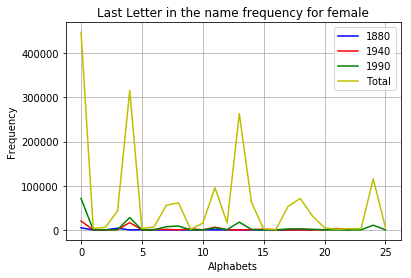

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
indexes1880 = np.arange(len(labelsF1880))
indexes1940 = np.arange(len(labelsF1940))
indexes1990 = np.arange(len(labelsF1990))
indexesT = np.arange(len(labelsT))


width = 0.35 

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, Male_count, width, color='r')

rects1 = ax.plot(indexes1880, valuesF1880, width, color='b')
rects2 = ax.plot(indexes1940, valuesF1940, width, color='r')
rects3 = ax.plot(indexes1990, valuesF1990, width, color='g')
rects4 = ax.plot(indexesT, valuesT, width, color='y')

ax.set_title('Last Letter in the name frequency for female')
ax.grid(True)
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('1880', '1940','1990','Total'))
ax.set_xlabel('Alphabets')
ax.set_ylabel('Frequency')
plt.show()
plt.savefig(os.path.join('female.png'), dpi=300, format='png', bbox_inches='tight')